# Titanic Passenger Survival Prediction
**Author:** Brett Vrtachnik  
**Date:** March 26, 2025  
**Objective:** Predict passenger survival rates on the Titanic using machine learning.



## Introduction
This lab explores predicting passenger survival on the Titanic using supervised machine learning models. We test different combinations of input features and evaluate multiple classifiers to determine which model and features best predict survival. Metrics such as accuracy, precision, recall, and F1-score are used to compare model performance.

## Section 1: Import and Inspect the Data

### Import Dependencies

In [198]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import pandas for data manipulation and analysis
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

### Load Titanic Dataset and Explore the Data

In [199]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Display basic information about the dataset
titanic.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [200]:
titanic.head(5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2: Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data


####  Impute missing values for age using the median

In [201]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)


# Fill in missing values for embark_town using the mode
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

C:\Users\bvrta\AppData\Local\Temp\ipykernel_26272\1116530593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\bvrta\AppData\Local\Temp\ipykernel_26272\1116530593.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

### 2.2 Feature Engineering

In [202]:
# Add family_size - number of family members on board
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
# Convert categorical "sex" to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
# Convert categorical "embarked" to numeric
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
# Binary feature - convert "alone" to numeric
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target

- We will select 3 input features and will use **survived** as the target. 

Case 1:

-input features: alone

-target: survived

Case 2:

-input features: age

-target: survived

Case 3:

-input features:  age and family_size

-target: survived


In [203]:
# Case 1: alone only 
X1 = titanic[['alone']]
y1 = titanic['survived']

# Case 2: age only
X2 = titanic[['age']]
y2 = titanic['survived']

# Case 3: age + family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['survived']

#### Reflection 3
- Why are these features selected? **They are numerical values that will be good metrics to train and test the models.**
- Are there any features that likely to be highly predictive of survival? **Family size and Age**

## Section 4: Train a Classification Model (**Decision Tree**)

### 4.1 Split the data
- Split the data into training and test sets

In [204]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X1, y1):
    X_train = X1.iloc[train_indices]
    X_test = X1.iloc[test_indices]
    y_train = y1.iloc[train_indices]
    y_test = y1.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))


Train size:  712 Test size:  179


### 4.2 Create and Train Model (**Decision Tree**)
- Create and train a decision tree model with no random initializer argument

In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance
- Evaluate model peformance on training and test data

In [206]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### 4.4 Report Confusion Matrix (as a heatmap)
- Plot a confusion matrix

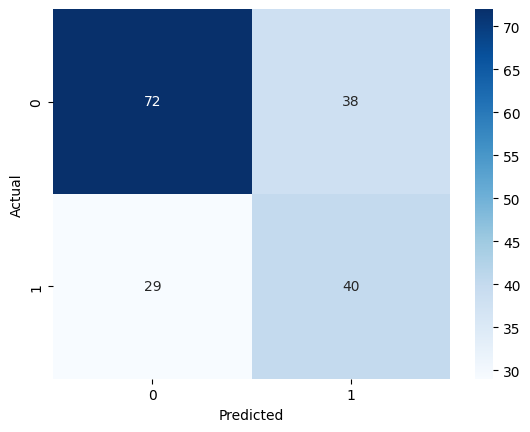

In [207]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

### 4.5 Report Decision Tree Plot
- Plot the decision tree model

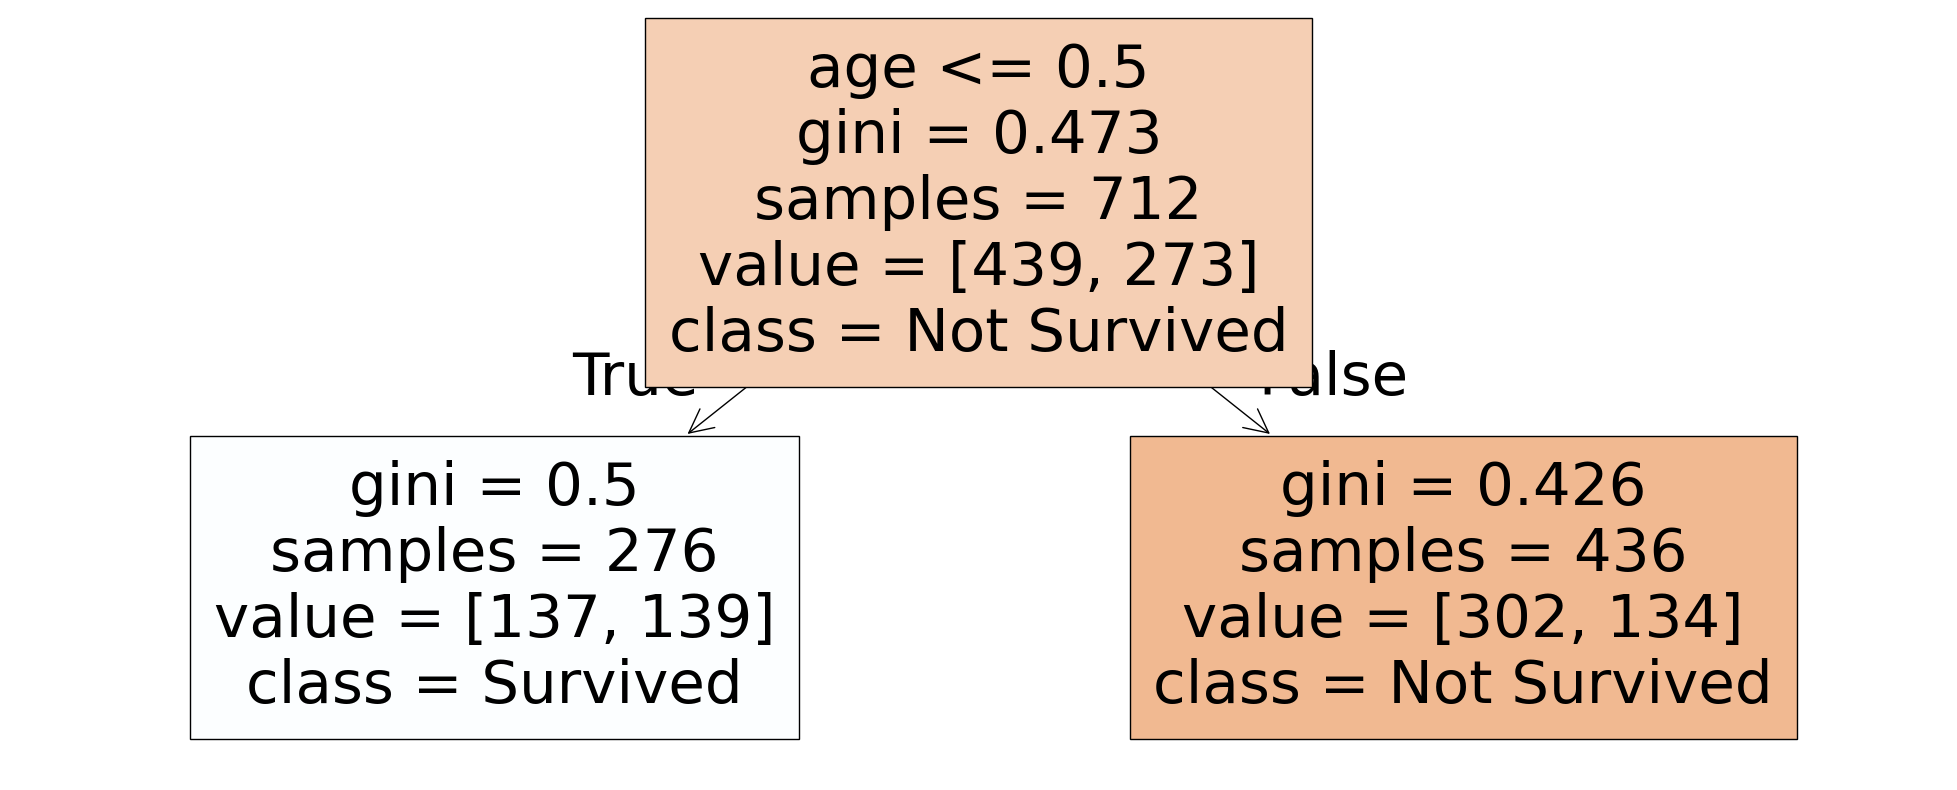

In [208]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

 ### 4.6 Repeat Steps 4.1-4.5 for **Case 2** From Section 3.1

In [209]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X2, y2):
    X2_train = X2.iloc[train_indices]
    X2_test = X2.iloc[test_indices]
    y2_train = y2.iloc[train_indices]
    y2_test = y2.iloc[test_indices]

print('Train size: ', len(X2_train), 'Test size: ', len(X2_test))

tree_model = DecisionTreeClassifier()
tree_model.fit(X2_train, y2_train)

y2_pred = tree_model.predict(X2_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y2_train, y2_pred))

y2_test_pred = tree_model.predict(X2_test)
print("Results for Decision Tree on test data:")
print(classification_report(y2_test, y2_test_pred))

Train size:  712 Test size:  179
Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



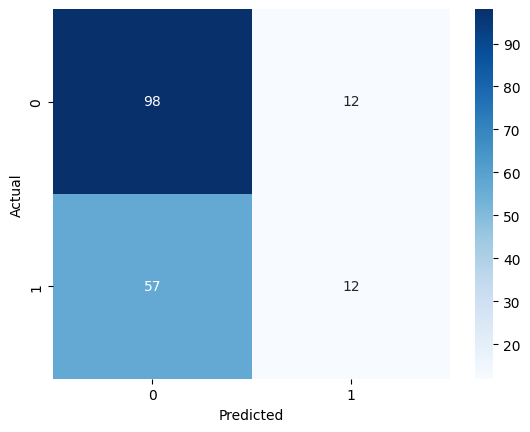

In [210]:
# Plot a confusion matrix
cm = confusion_matrix(y2_test, y2_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

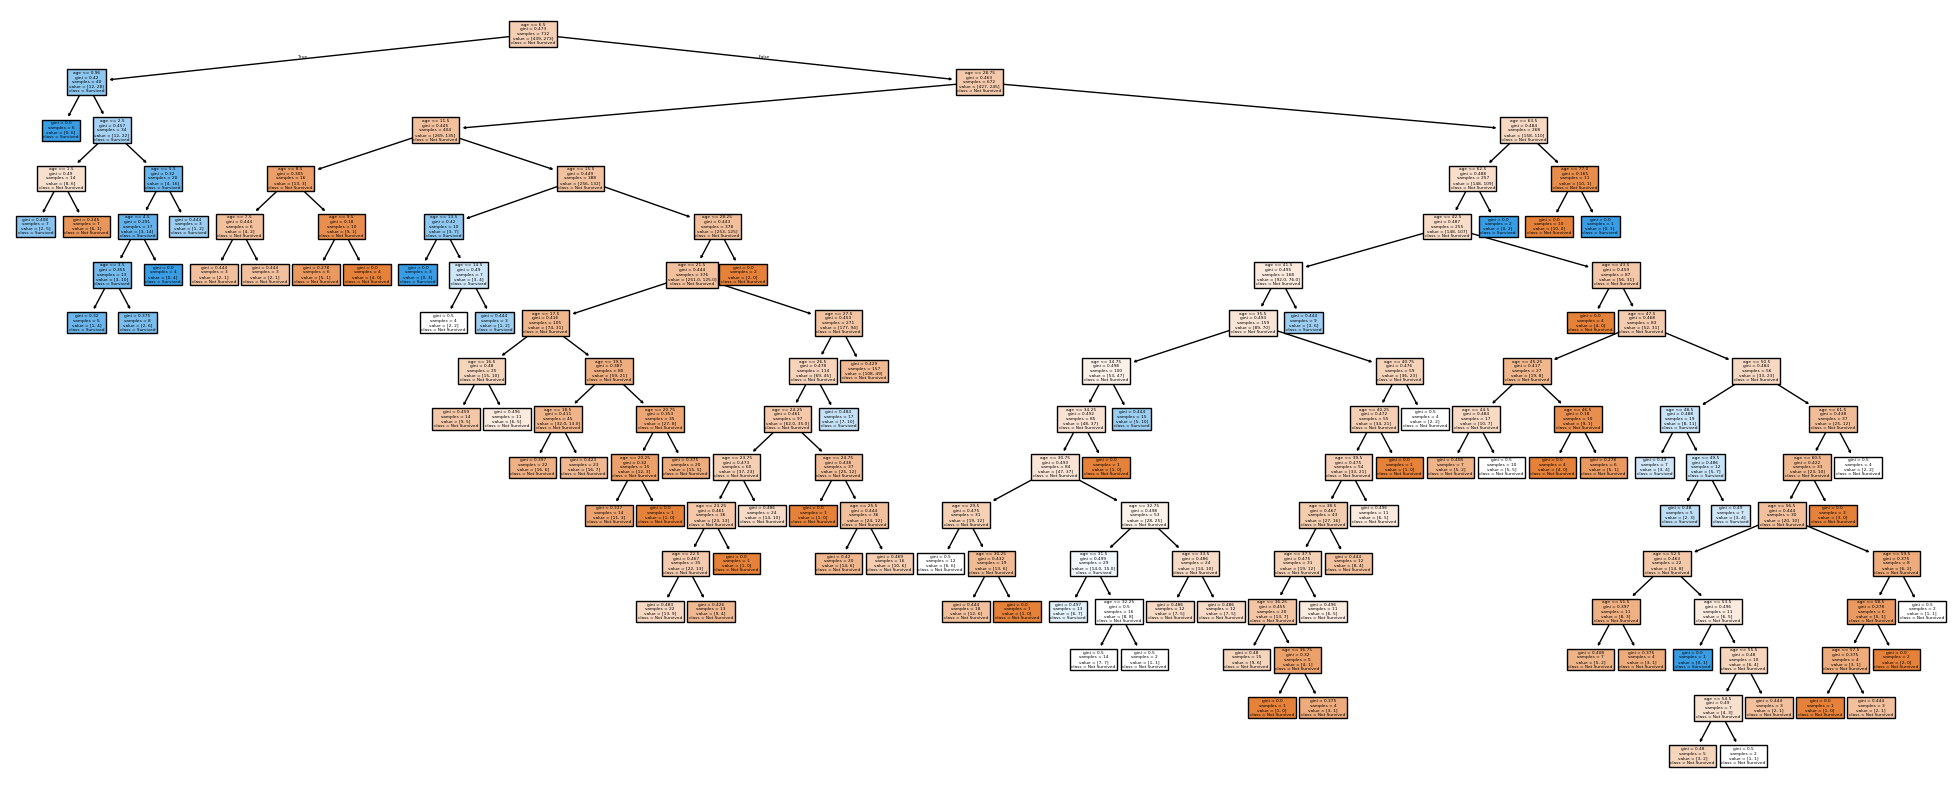

In [211]:
# Plot the decision tree model
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_2.png")

### 4.7 Repeat Sections 4.1-4.5 for **Case 3** From Section 3.1

In [212]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X3, y3):
    X3_train = X3.iloc[train_indices]
    X3_test = X3.iloc[test_indices]
    y3_train = y3.iloc[train_indices]
    y3_test = y3.iloc[test_indices]

print('Train size: ', len(X3_train), 'Test size: ', len(X3_test))

tree_model = DecisionTreeClassifier()
tree_model.fit(X3_train, y3_train)

y3_pred = tree_model.predict(X3_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y3_train, y3_pred))

y3_test_pred = tree_model.predict(X3_test)
print("Results for Decision Tree on test data:")
print(classification_report(y3_test, y3_test_pred))

Train size:  712 Test size:  179
Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



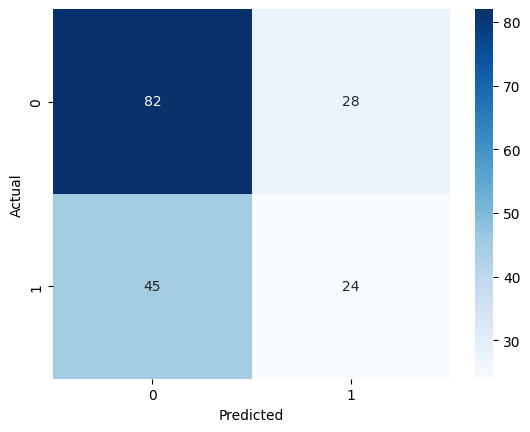

In [213]:
# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y3_test, y3_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

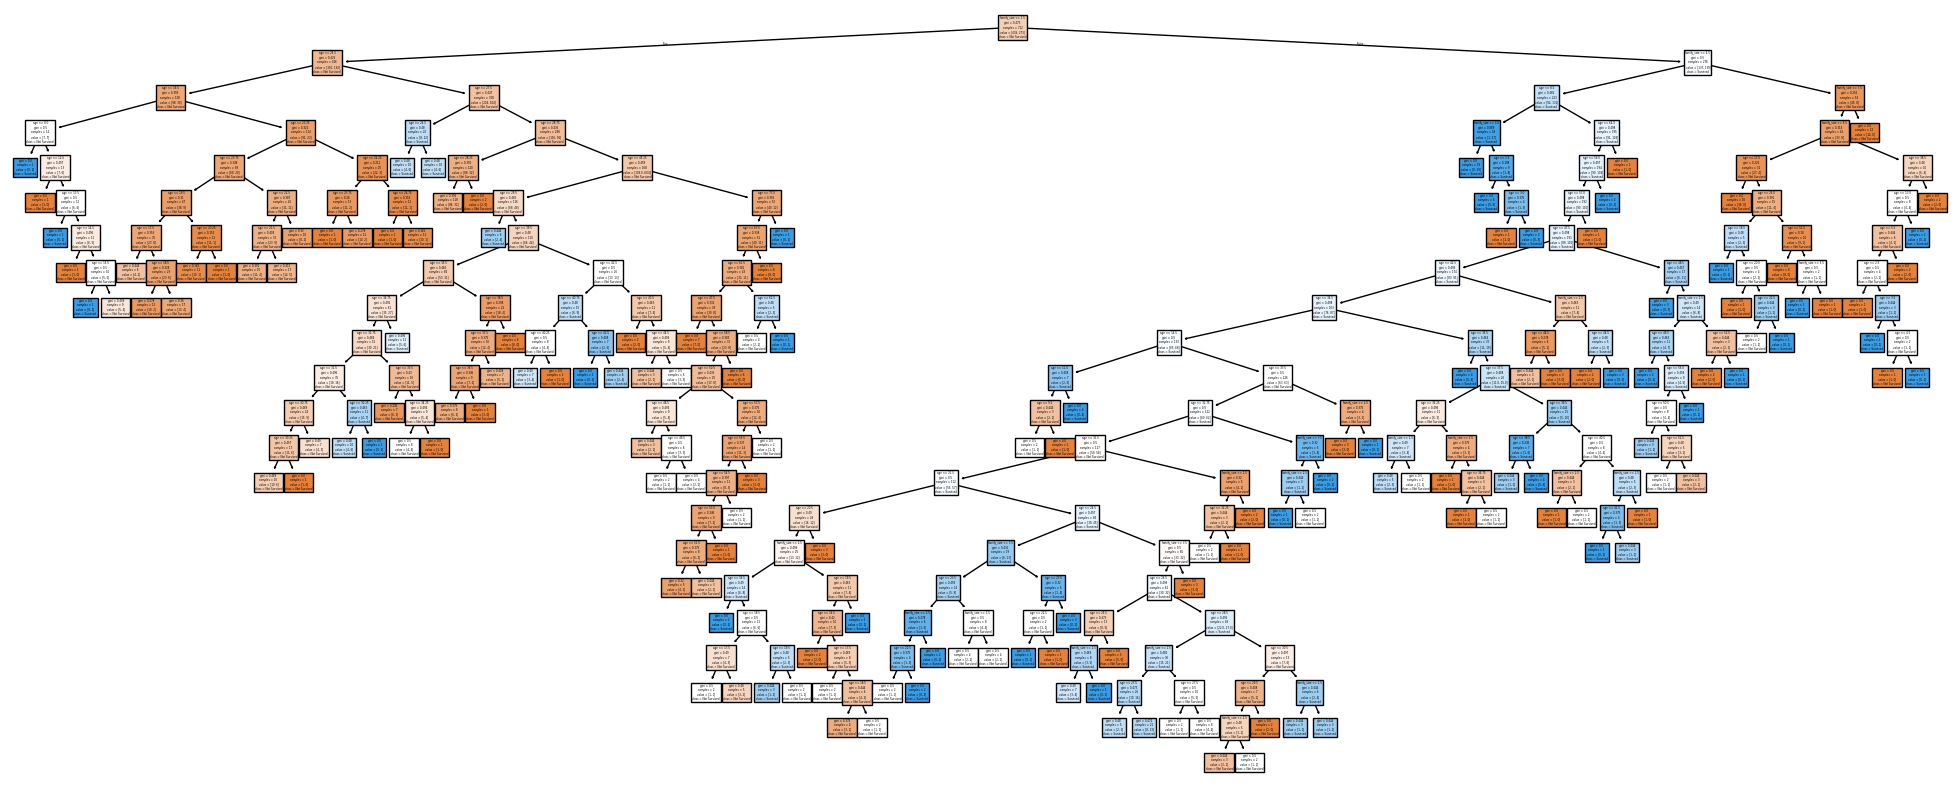

In [214]:
# Plot the decision tree model
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X3.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_3.png")

#### Reflection 4:
How well did the different cases perform?
- Case 1 (alone) performed the best across all 4 metrics, with Case 2 (age) in the middle and Case 3 (age + family size) with the lowest 4 metrics.

Are there any surprising results?
- Case 3 was surprising at how low the results were, suggesting that adding a variable may have introduced more noise instead of improving the model.

Which inputs worked better?
- Case 1 gave the most consistent results.

## Section 5. Compare Alternative Models (**SVC, NN**)

In [215]:
# RBF Kernel (default) - same as calling SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

### 5.1 Train and Evaluate Model (**SVC**)

In [216]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define the kernels you want to test
kernel_list = [
    ('RBF (default)', SVC(kernel='rbf')),
    ('Linear', SVC(kernel='linear')),
    ('Polynomial (degree=3)', SVC(kernel='poly', degree=3)),
    ('Sigmoid', SVC(kernel='sigmoid'))
]

# Loop through and evaluate each kernel
for kernel_name, svc_model in kernel_list:
    print('\n' + '_' * 50)
    print(f"Results for SVC ({kernel_name}) on test data:")

    svc_model.fit(X_train, y_train)
    y_pred = svc_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred, zero_division=0))



__________________________________________________
Results for SVC (RBF (default)) on test data:
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179


__________________________________________________
Results for SVC (Linear) on test data:
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179


__________________________________________________
Results for SVC (Polynomial (degree=3)) on test data:
Accuracy: 0.63
      

In [217]:
# Predict and evaluate the SVC model
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### Visualize Support Vectors
- We will create a scatter plot to visualize the support vectors
- Step-by-Step Process
1. Split the data into two groups:
- Survived - Passengers who survived the Titanic sinking (value = 1)
- Not Survived - Passengers who did **not** survive (value = 0)
2. Create a scatter plot of these two groups using different colors and markers:
- Yellow squares ('s') for survived passengers
- Cyan triangles ('^') for non-survived passengers
3. Overlay the support vectors on top of the plot:
- Black pluses ('+') will represent the support vectors
- Since the support vectors are plotted last, they appear on top of the data points and are not obscured

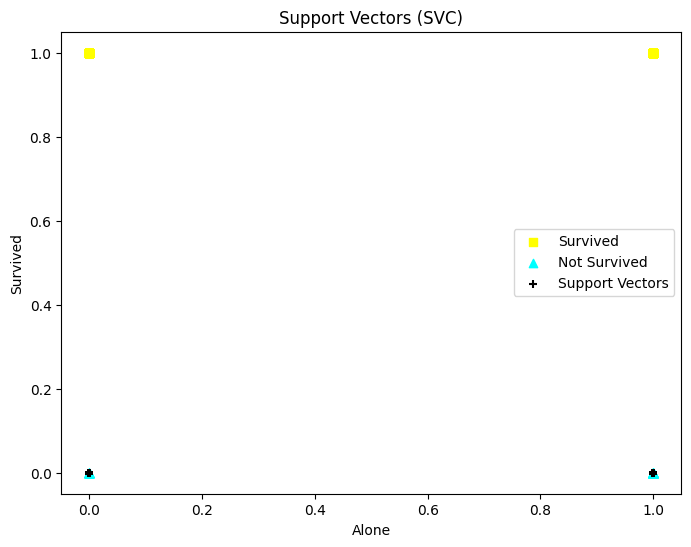

In [218]:
# Create data for charting - input target yes and input target no
survived_alone = X_test.loc[y_test == 1, 'alone']
not_survived_alone = X_test.loc[y_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

### 5.2 Train and Evaluate Model (**NN MLP**)



In [219]:
from sklearn.neural_network import MLPClassifier


nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')

In [220]:
# Predict and evaluate the neural network model
y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



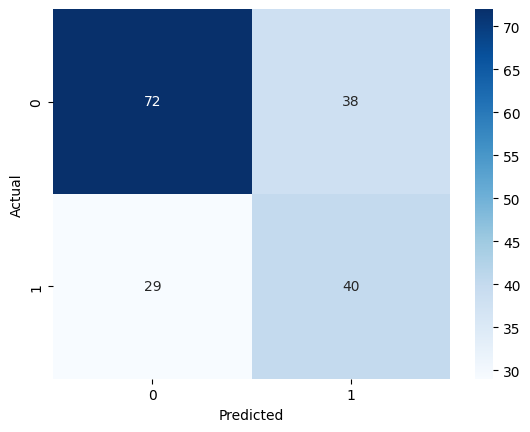

In [221]:
# Plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Reflection 5:
How well did each model perform?
- MLP had the highest metrics. 
- RBF had the next highest precision and accuracy, but had the lowest F1 scores. 
- Linear had moderate accuracy and recall, but had poor precision and low F1-scores
- Poly had moderate accuracy and performed well for Case 1, but had low precision and F1-scores for Case 2 and Case 3
- Sigmoid performed well for Case 1,  but was low in all 4 categories for Case 2 and Case 3

Are there any surprising results?
- It's surprising that Sigmoid performed poorly 2 out of the 3 cases.

Why might one model outperform the others?
- Some models are better at finding patterns in the data. MLP handled the data well because it can capture more complex relationships. The Sigmoid model didn’t do as well, likely because it’s not a good fit for this type of problem. Each model works differently depending on how the data is structured.

## Section 6. Final Thoughts & Insights


### 6.1 Summarize Findings
- ‘Alone’ was the best predictor of survival. The Neural Network performed the best overall, especially in Case 3. While the Decision Tree worked well in some cases, adding more variables often introduced noise, showing that a strong single predictor can be more effective than using more data

### 6.2 Discuss Challenges Faced
- The small sample size made it harder to apply the results more broadly. There were also missing values that had to be cleaned, which may have affected the model’s performance and predictions.

### 6.3 Next Steps
- Experiment with features like pclass, fare, embarked, or deck to improve model performance. These could offer more relevant information for survival prediction. Also, adjust hyperparameters to fine-tune the models and improve accuracy. Testing the models on a larger dataset or using techniques like cross-validation could provide more reliable results.